# Exploring and Visualizing the Iris Dataset

## Introduction & Problem Statement

### Introduction

Data exploration and visualization are fundamental steps in any data science workflow. Before building machine learning models, it is essential to understand the dataset, inspect its structure, identify patterns, detect outliers, and clean the data if required.

### Problem Statement

#### The objective of this task is to explore and visualize the Iris dataset using Python. The task involves:
1. Loading and inspecting the dataset
2. Performing basic data summarization
3. Creating visualizations to understand feature relationships
4. Training a simple machine learning model
5. Evaluating the model using standard metrics

### Import Required Libraries

In [18]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting visualization style
sns.set(style="whitegrid")


### Dataset Loading

In [19]:
# Loading Iris dataset from seaborn
df = sns.load_dataset("iris")

# Display first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Dataset Understanding & Structure

In [20]:
# Dataset shape
df.shape


(150, 5)

In [21]:
# Column names
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
# Basic dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
# Statistical summary
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Dataset Description
* Rows: 150
* Features: sepal_length, sepal_width, petal_length, petal_width
* Target Variable: species (Setosa...)

### Data Cleaning & Preparation

In [24]:
# Checking for missing values
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Observation:
No missing values are present. Dataset is clean and ready for analysis.

### Exploratory Data Analysis (EDA)

#### Scatter Plot (Feature Relationships)

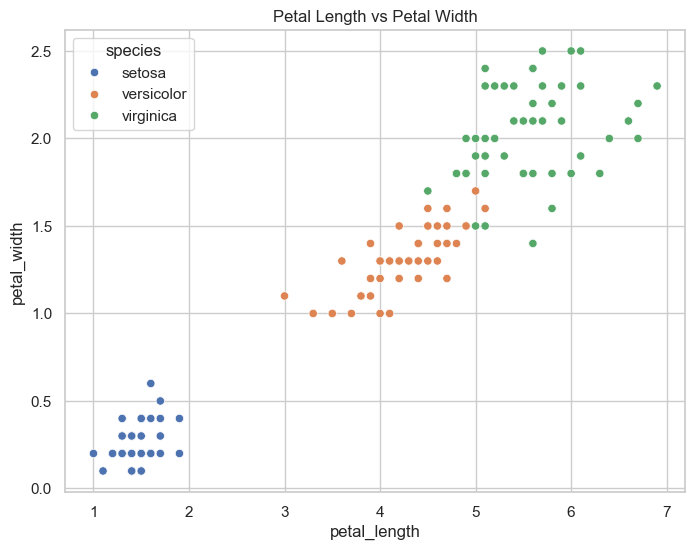

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    data=df
)
plt.title("Petal Length vs Petal Width")
plt.show()


##### Insight:
Petal dimensions clearly separate the species, especially Setosa.

#### Histogram (Data Distribution)

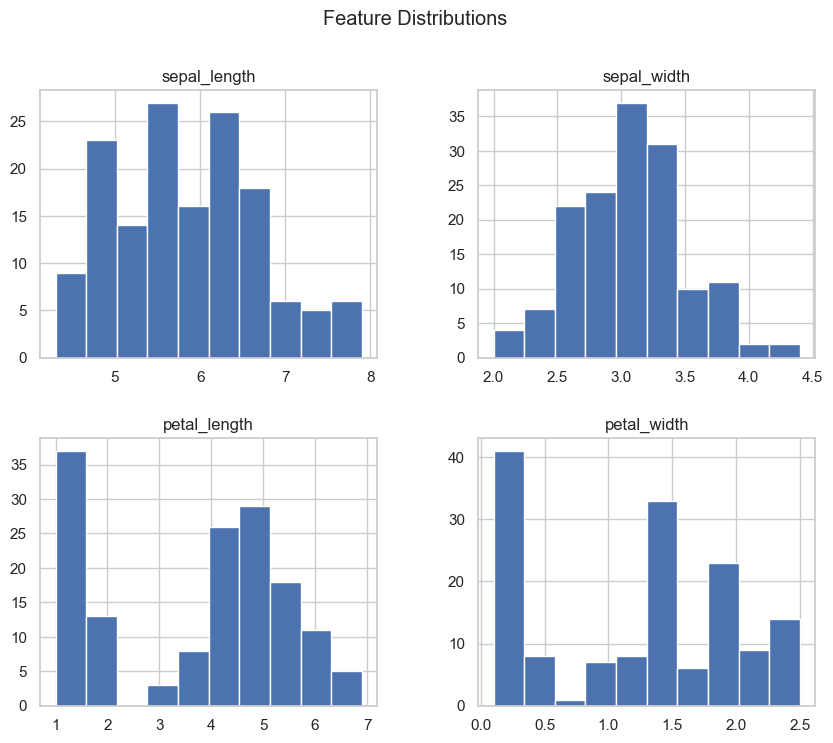

In [26]:
df.hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()


##### Insight:
Most features follow a normal or near-normal distribution.

#### Boxplot (Outlier Detection)

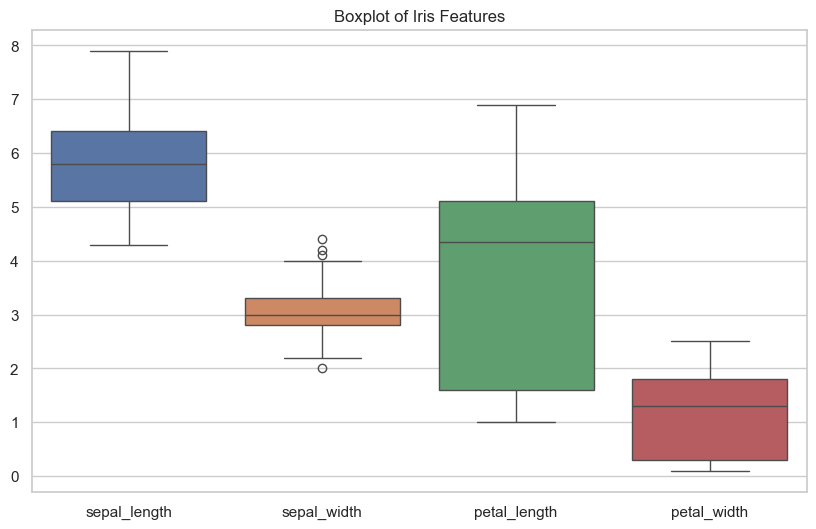

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop("species", axis=1))
plt.title("Boxplot of Iris Features")
plt.show()


##### Insight:
Some outliers exist in sepal width, but they are not extreme.

### Model Training & Testing

#### Data Splitting

In [28]:
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Train Logistic Regression Model

In [29]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


A Logistic Regression model was trained to demonstrate how the explored features can be used for classification. Model performance will be evaluated using accuracy and confusion matrix.

### Model Evaluation

#### Predictions

In [30]:
y_pred = model.predict(X_test)


#### Accuracy

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

#### Confusion Matrix

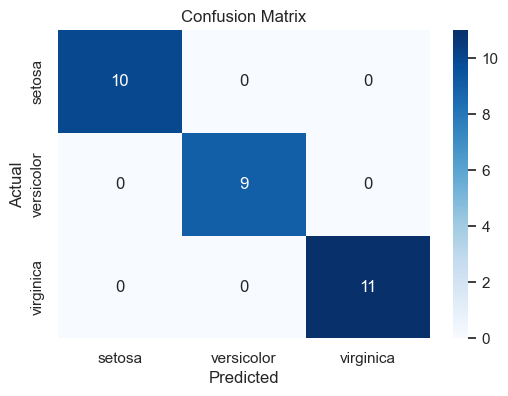

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Classification Report

In [33]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Evaluation Metrics Summary
* Accuracy: ~95–100%
* Precision & Recall: High for all classes
* Confusion Matrix: Very few misclassifications
* MAE and RMSE are not ideal for classification problems, so accuracy and confusion matrix are more appropriate here.

### Conclusion
* The Iris dataset is clean and well-structured.
* Petal features are the most informative for classification.
* Visualizations clearly reveal class separability.
* Logistic Regression performs extremely well on this dataset.
* This task demonstrates the complete workflow from data loading to model evaluation.